# Analysis on the customer churn dataset
*   [Summary](#summary)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Reading the csv

In [2]:
# csv must be in the same folder as the notebook
churn = pd.read_csv('churn.csv')

Exploratory Data Analysis

In [3]:
# looking at the first 5 records of the data
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Getting the information about each column
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that total charges is supposed to be a float value, but is an object. 
Upon further inspection, we can see that there are a few empty spaces in the column, so we must fix it before porceeding with our analysis.


In [5]:
print(f"Number of rows with blank spaces: {len(churn[churn['TotalCharges'] == ' '])}")

Number of rows with blank spaces: 11


In [6]:
# Replacing blank space with Nan
churn['TotalCharges']  = churn.TotalCharges.replace(' ',np.nan,regex = True)

In [7]:
# We can now change the data type for the column TotalCharges
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'])

In [8]:
# We fixed the missing values
len(churn[churn['TotalCharges'] == ' '])

0

In [9]:
# Imputing the missing values with mean
churn['TotalCharges'] = churn['TotalCharges'].transform(lambda x: x.fillna(x.mean()))

In [10]:
# Checking the unique values for each column
for col in churn:
    print(col, churn[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

From this we can see that the customerID column might not be useful for analysis. Senior citizen is the only binary variable which is a one and a zero.

In [11]:
# Checking for duplicates
duplicates = churn.duplicated()
duplicates.sum()

0

In [12]:
# Seperating the variables as cartegorical and numerical
categorical_variables = list(churn.dtypes[churn.dtypes == 'object'].index)
numerical_variables = list(churn.dtypes[churn.dtypes != 'object'].index)

In [13]:
# Removing Senior citizen from numerical and appending it to categorical because it is binary, removing customer ID
numerical_variables.pop(0)
categorical_variables.pop(0)
categorical_variables.append('SeniorCitizen')

# Univariate analysis <a id="Univariate-analysis"></a>

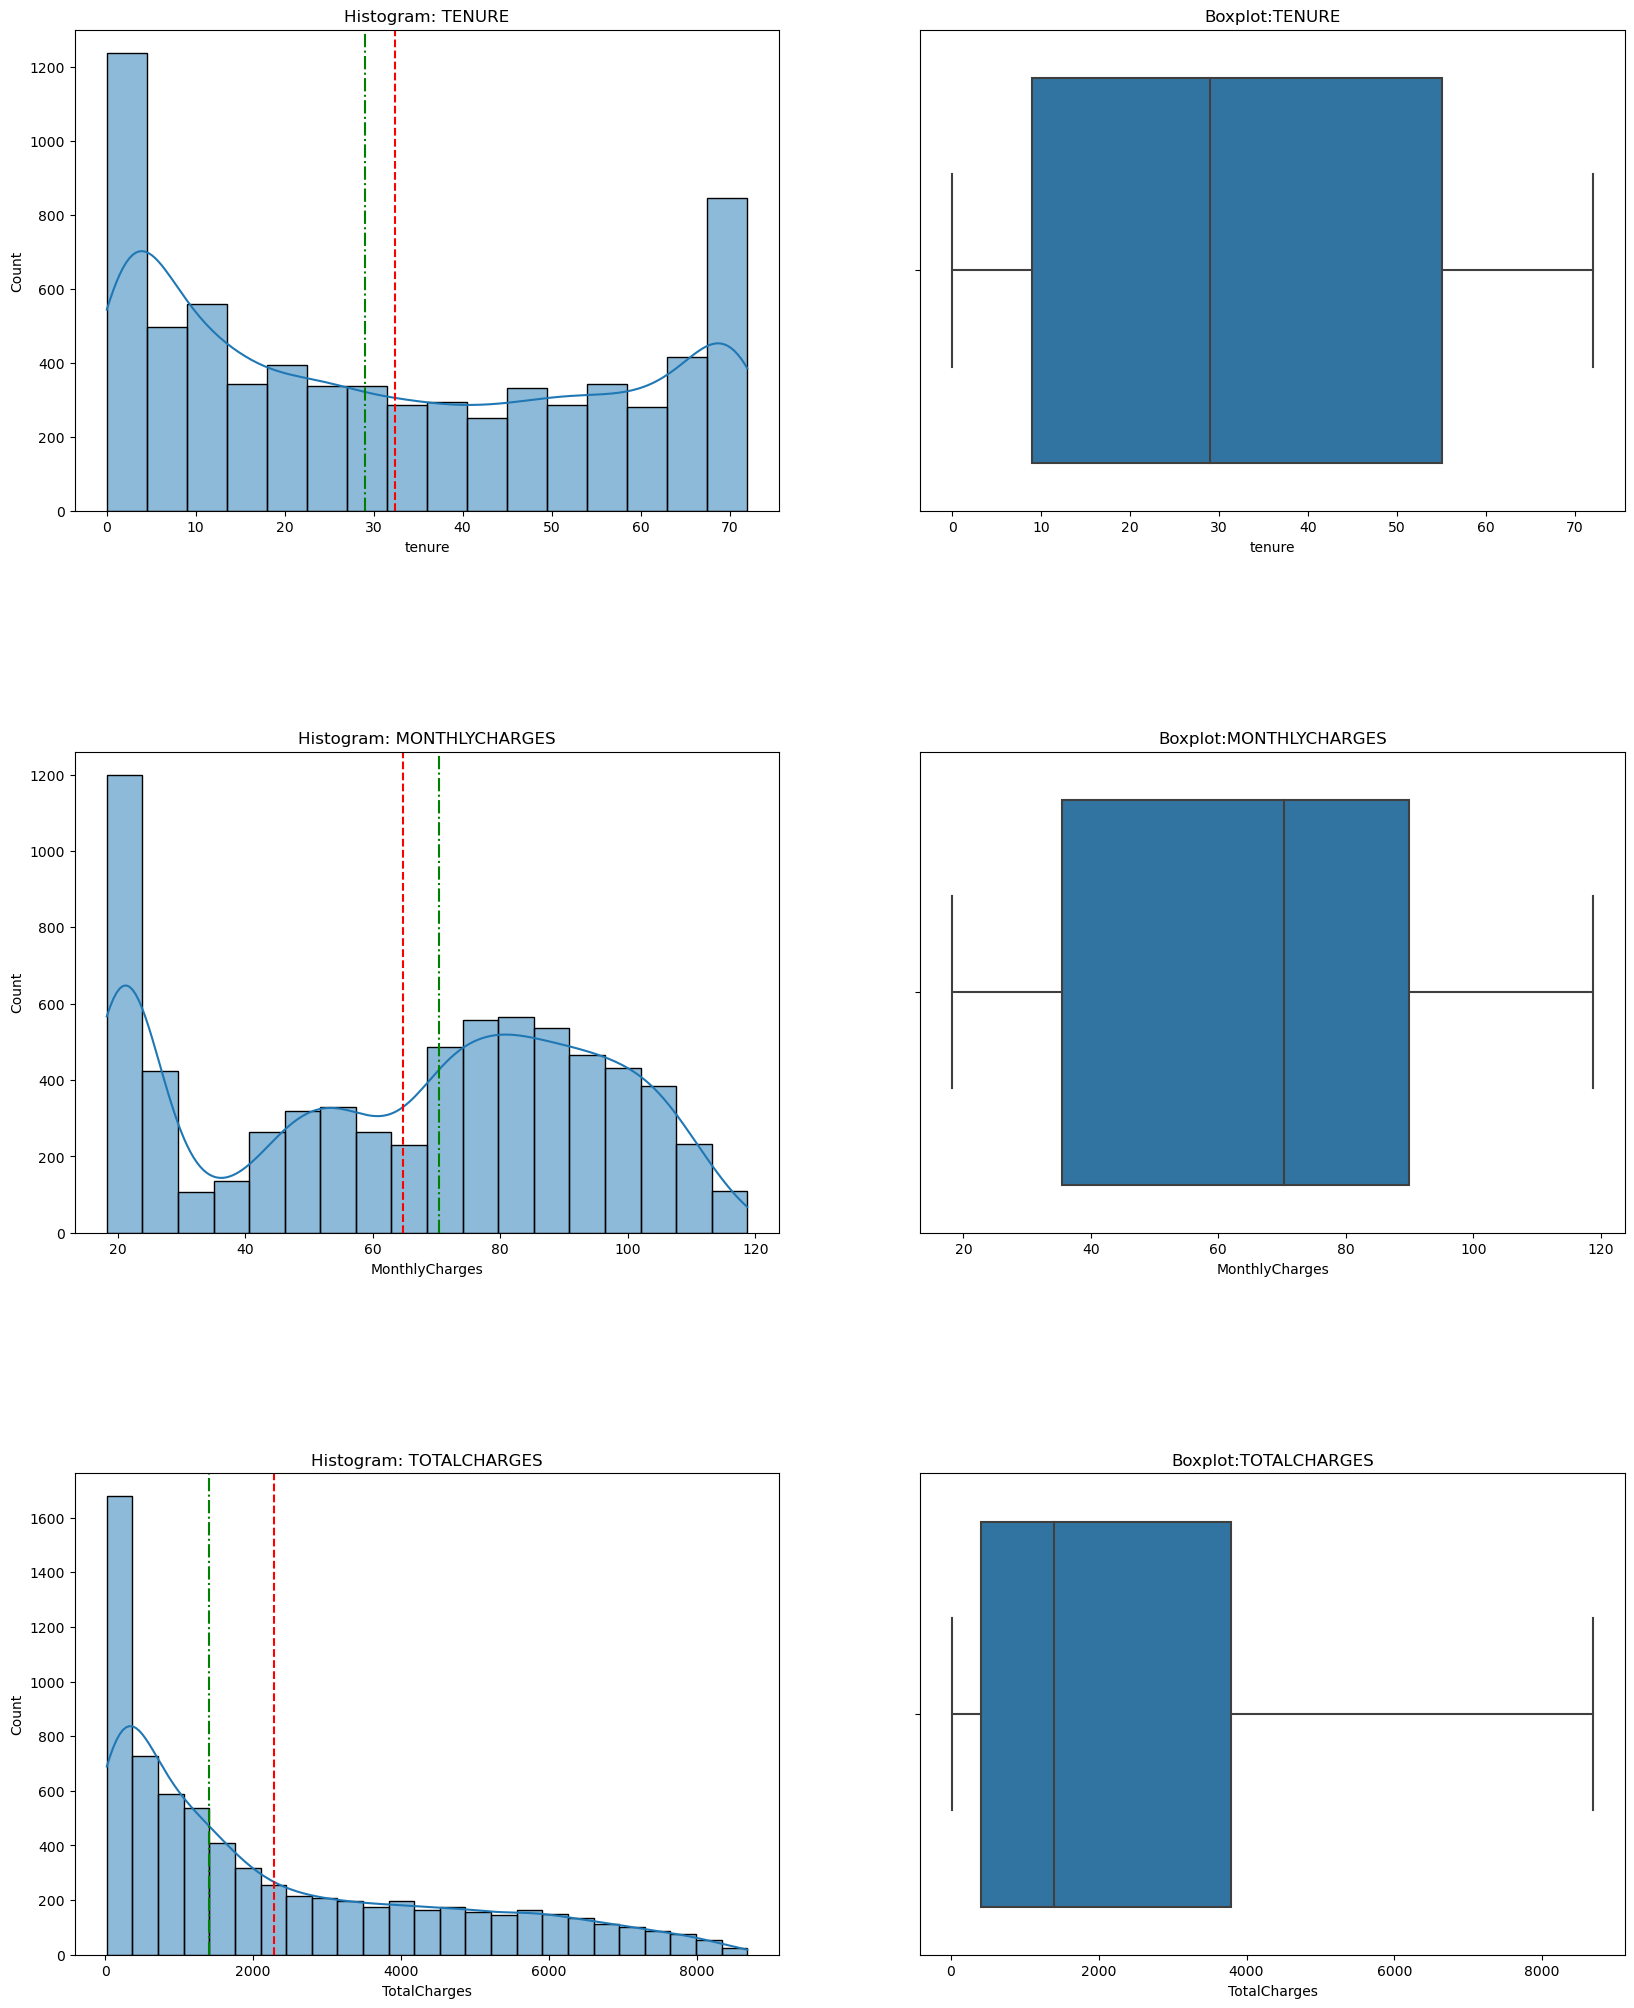

In [14]:
# Creating histograms and boxplots for the numerical variables
fig,axes = plt.subplots(3,2,figsize=(20,25))
plt.subplots_adjust(hspace=0.5,wspace=0.2)
for i,j in zip(numerical_variables,axes):
    sns.histplot(x=i,data = churn[numerical_variables],ax=j[0],kde=True)
    j[0].axvline(x = churn[numerical_variables][i].mean(),linestyle = '--',color = 'red')
    j[0].axvline(x = churn[numerical_variables][i].median(),linestyle = '-.',color = 'green')
    j[0].set_title('Histogram: '+i.upper())
    sns.boxplot(x = i,data = churn[numerical_variables],ax=j[1],orient='h')
    j[1].set_title('Boxplot:' +i.upper())

In [15]:
# Getting the stats for the numerical variable
churn.describe().drop('SeniorCitizen', axis = 1)

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


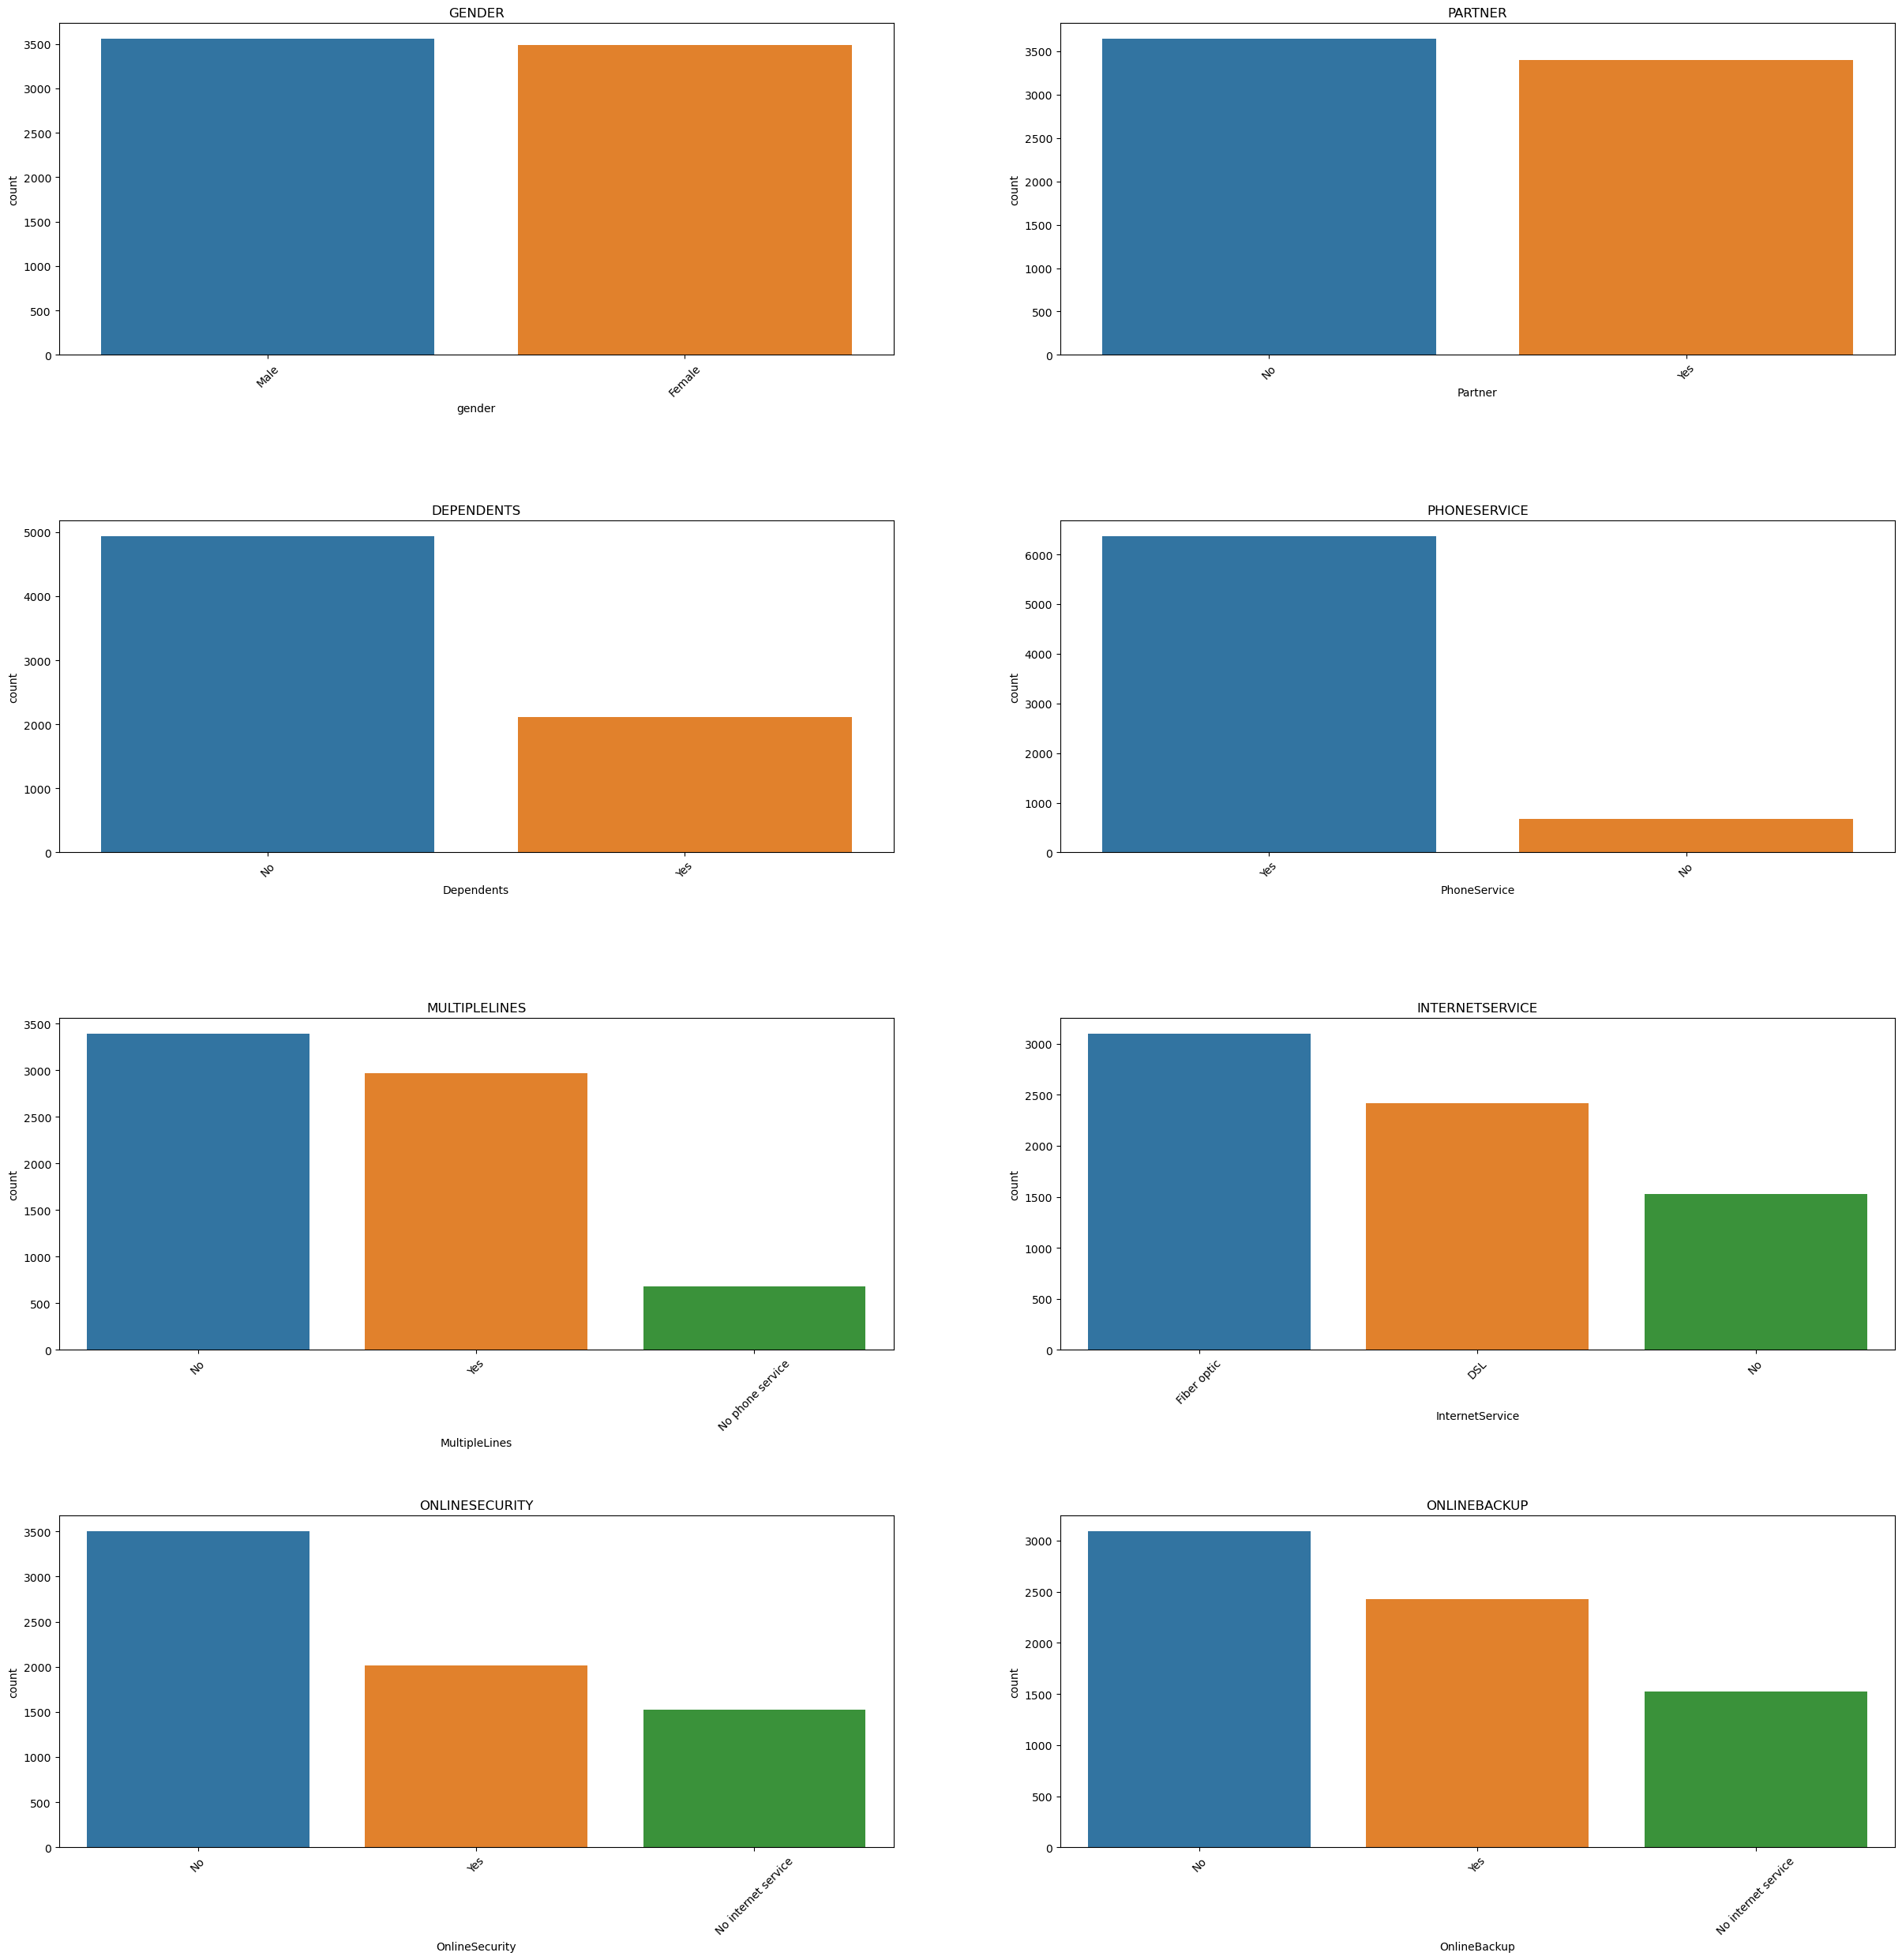

In [16]:
# Creating countplots for the categorical variables
fig,axes = plt.subplots(4,2,figsize = (30,30))
plt.subplots_adjust(hspace=0.5,wspace=0.2)
for i,j in zip(categorical_variables[0:8],axes.flatten()):
    sns.countplot(x = i,ax = j,data = churn,order = list(churn[i].value_counts().index))
    j.set_xticklabels(labels = list(churn[i].value_counts().index),rotation = 45)
    j.set_title(i.upper())

In [17]:
for i in categorical_variables[0:4]:
    print(f"{churn[i].value_counts(normalize = True)} \n")

Male      0.504756
Female    0.495244
Name: gender, dtype: float64 

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64 

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64 

Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64 



In [18]:
for i in categorical_variables[4:8]:
    print(f"{churn[i].value_counts(normalize = True)} \n")

No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64 

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64 

No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64 

No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64 



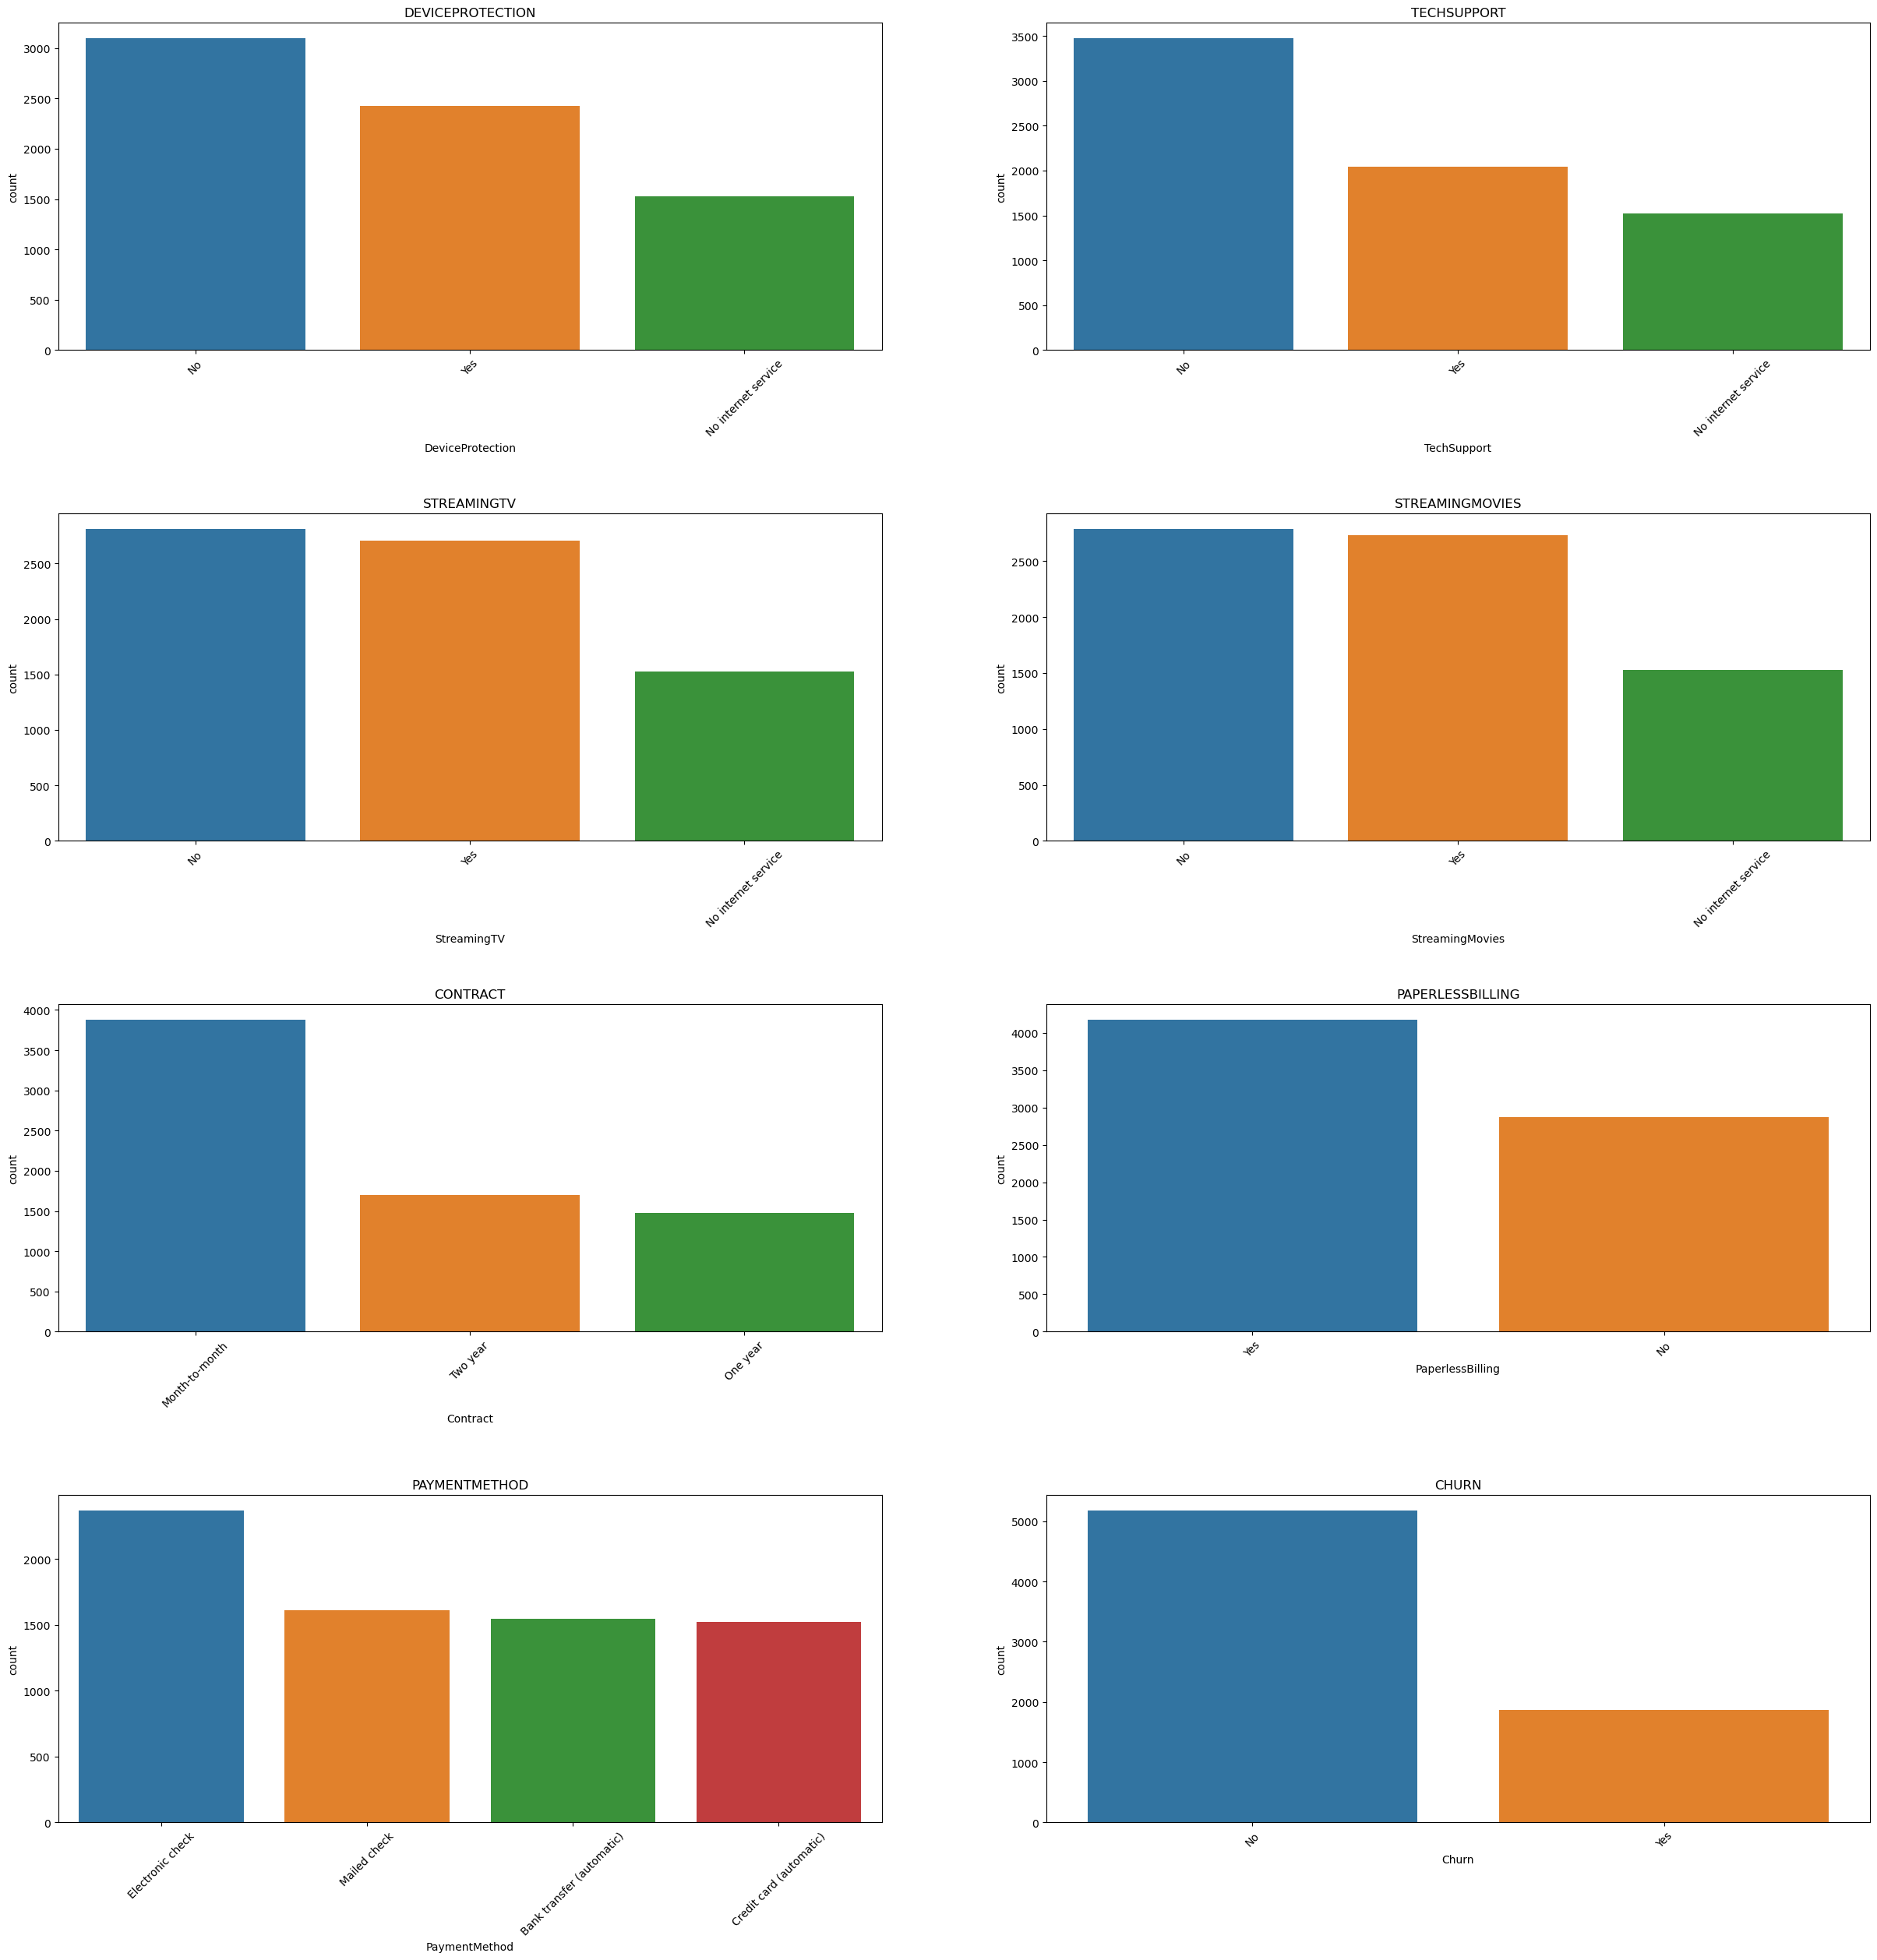

In [19]:
# Creating countplots for the categorical variables
fig,axes = plt.subplots(4,2,figsize = (30,30))
plt.subplots_adjust(hspace=0.5,wspace=0.2)
for i,j in zip(categorical_variables[8:],axes.flatten()):
    sns.countplot(x = i,ax = j,data = churn,order = list(churn[i].value_counts().index))
    j.set_xticklabels(labels = list(churn[i].value_counts().index),rotation = 45)
    j.set_title(i.upper())

In [20]:
for i in categorical_variables[8:13]:
    print(f"{churn[i].value_counts(normalize = True)} \n")

No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64 

No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64 

No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64 

No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64 

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64 



In [21]:
for i in categorical_variables[13:]:
    print(f"{churn[i].value_counts(normalize = True)} \n")

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64 

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64 

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64 

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64 



# Bivariate Analysis <a name="Bivariate-analysis"></a>

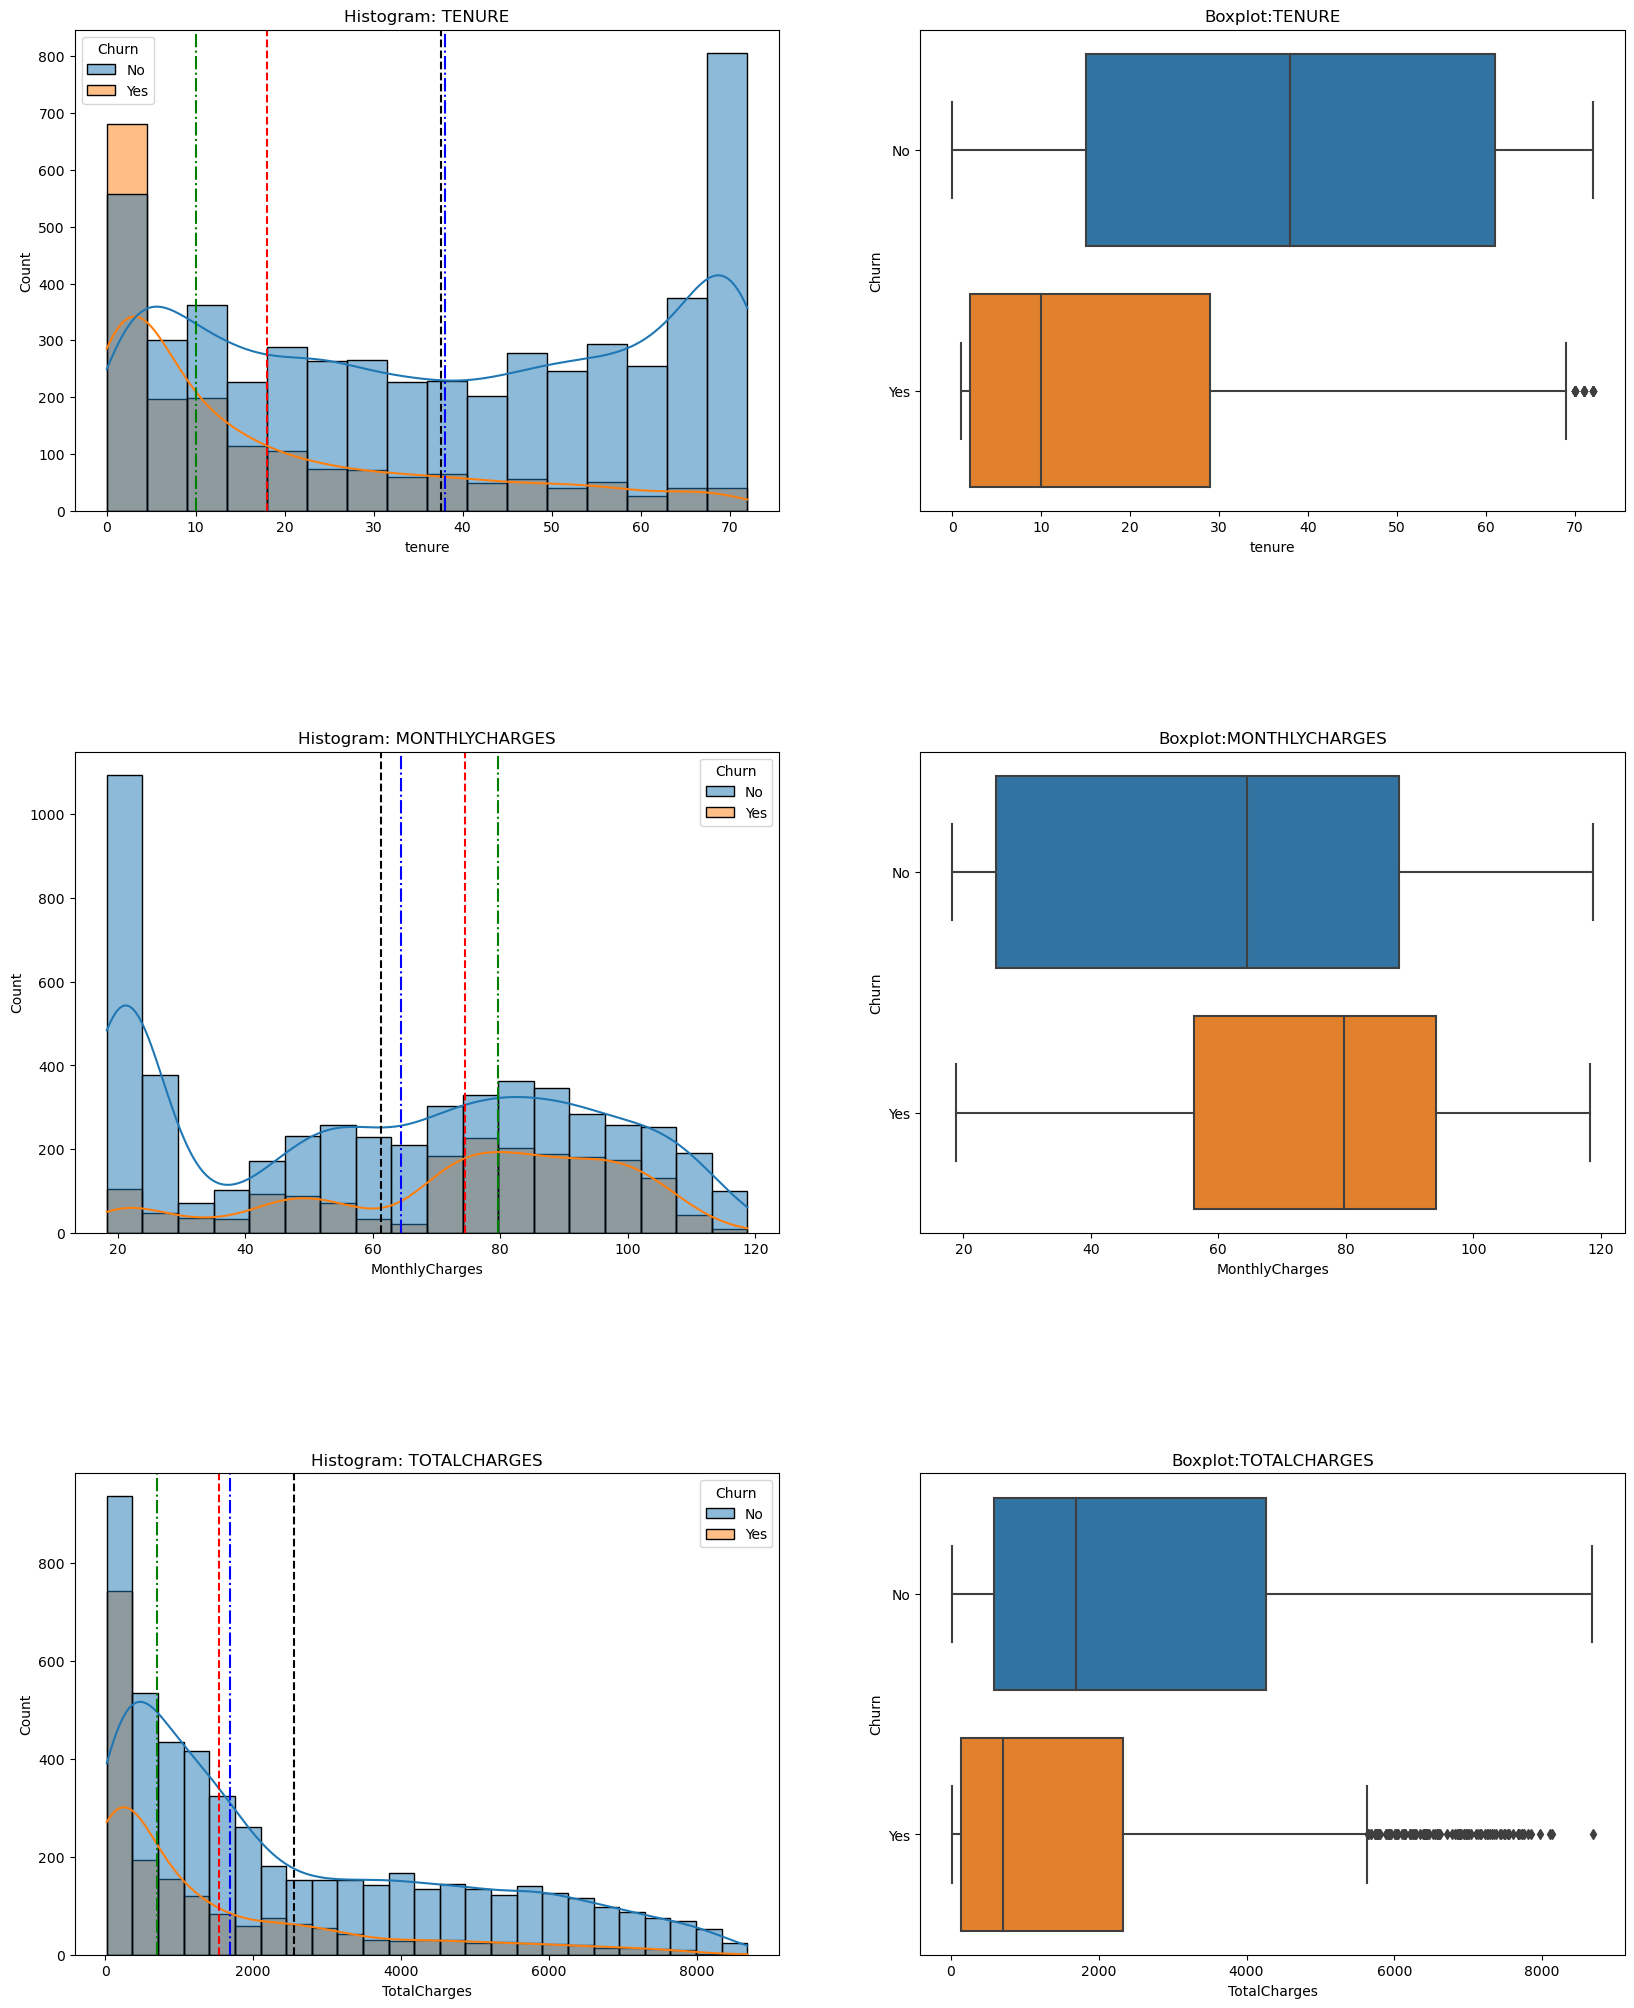

In [22]:
fig,axes = plt.subplots(3,2,figsize=(20,25))
plt.subplots_adjust(hspace=0.5,wspace=0.2)
for i,j in zip(numerical_variables,axes):
    sns.histplot(x=i,data = churn,ax=j[0],kde=True,hue = 'Churn')
    j[0].axvline(x = churn[churn['Churn'] == 'Yes'][i].mean(),linestyle = '--',color = 'red')
    j[0].axvline(x = churn[churn['Churn'] == 'Yes'][i].median(),linestyle = '-.',color = 'green')
    j[0].axvline(x = churn[churn['Churn'] == 'No'][i].mean(),linestyle = '--',color = 'black')
    j[0].axvline(x = churn[churn['Churn'] == 'No'][i].median(),linestyle = '-.',color = 'blue')
    j[0].set_title('Histogram: '+i.upper())
    sns.boxplot(x = i,y = 'Churn',data = churn,ax=j[1],orient='h')
    j[1].set_title('Boxplot:' +i.upper())


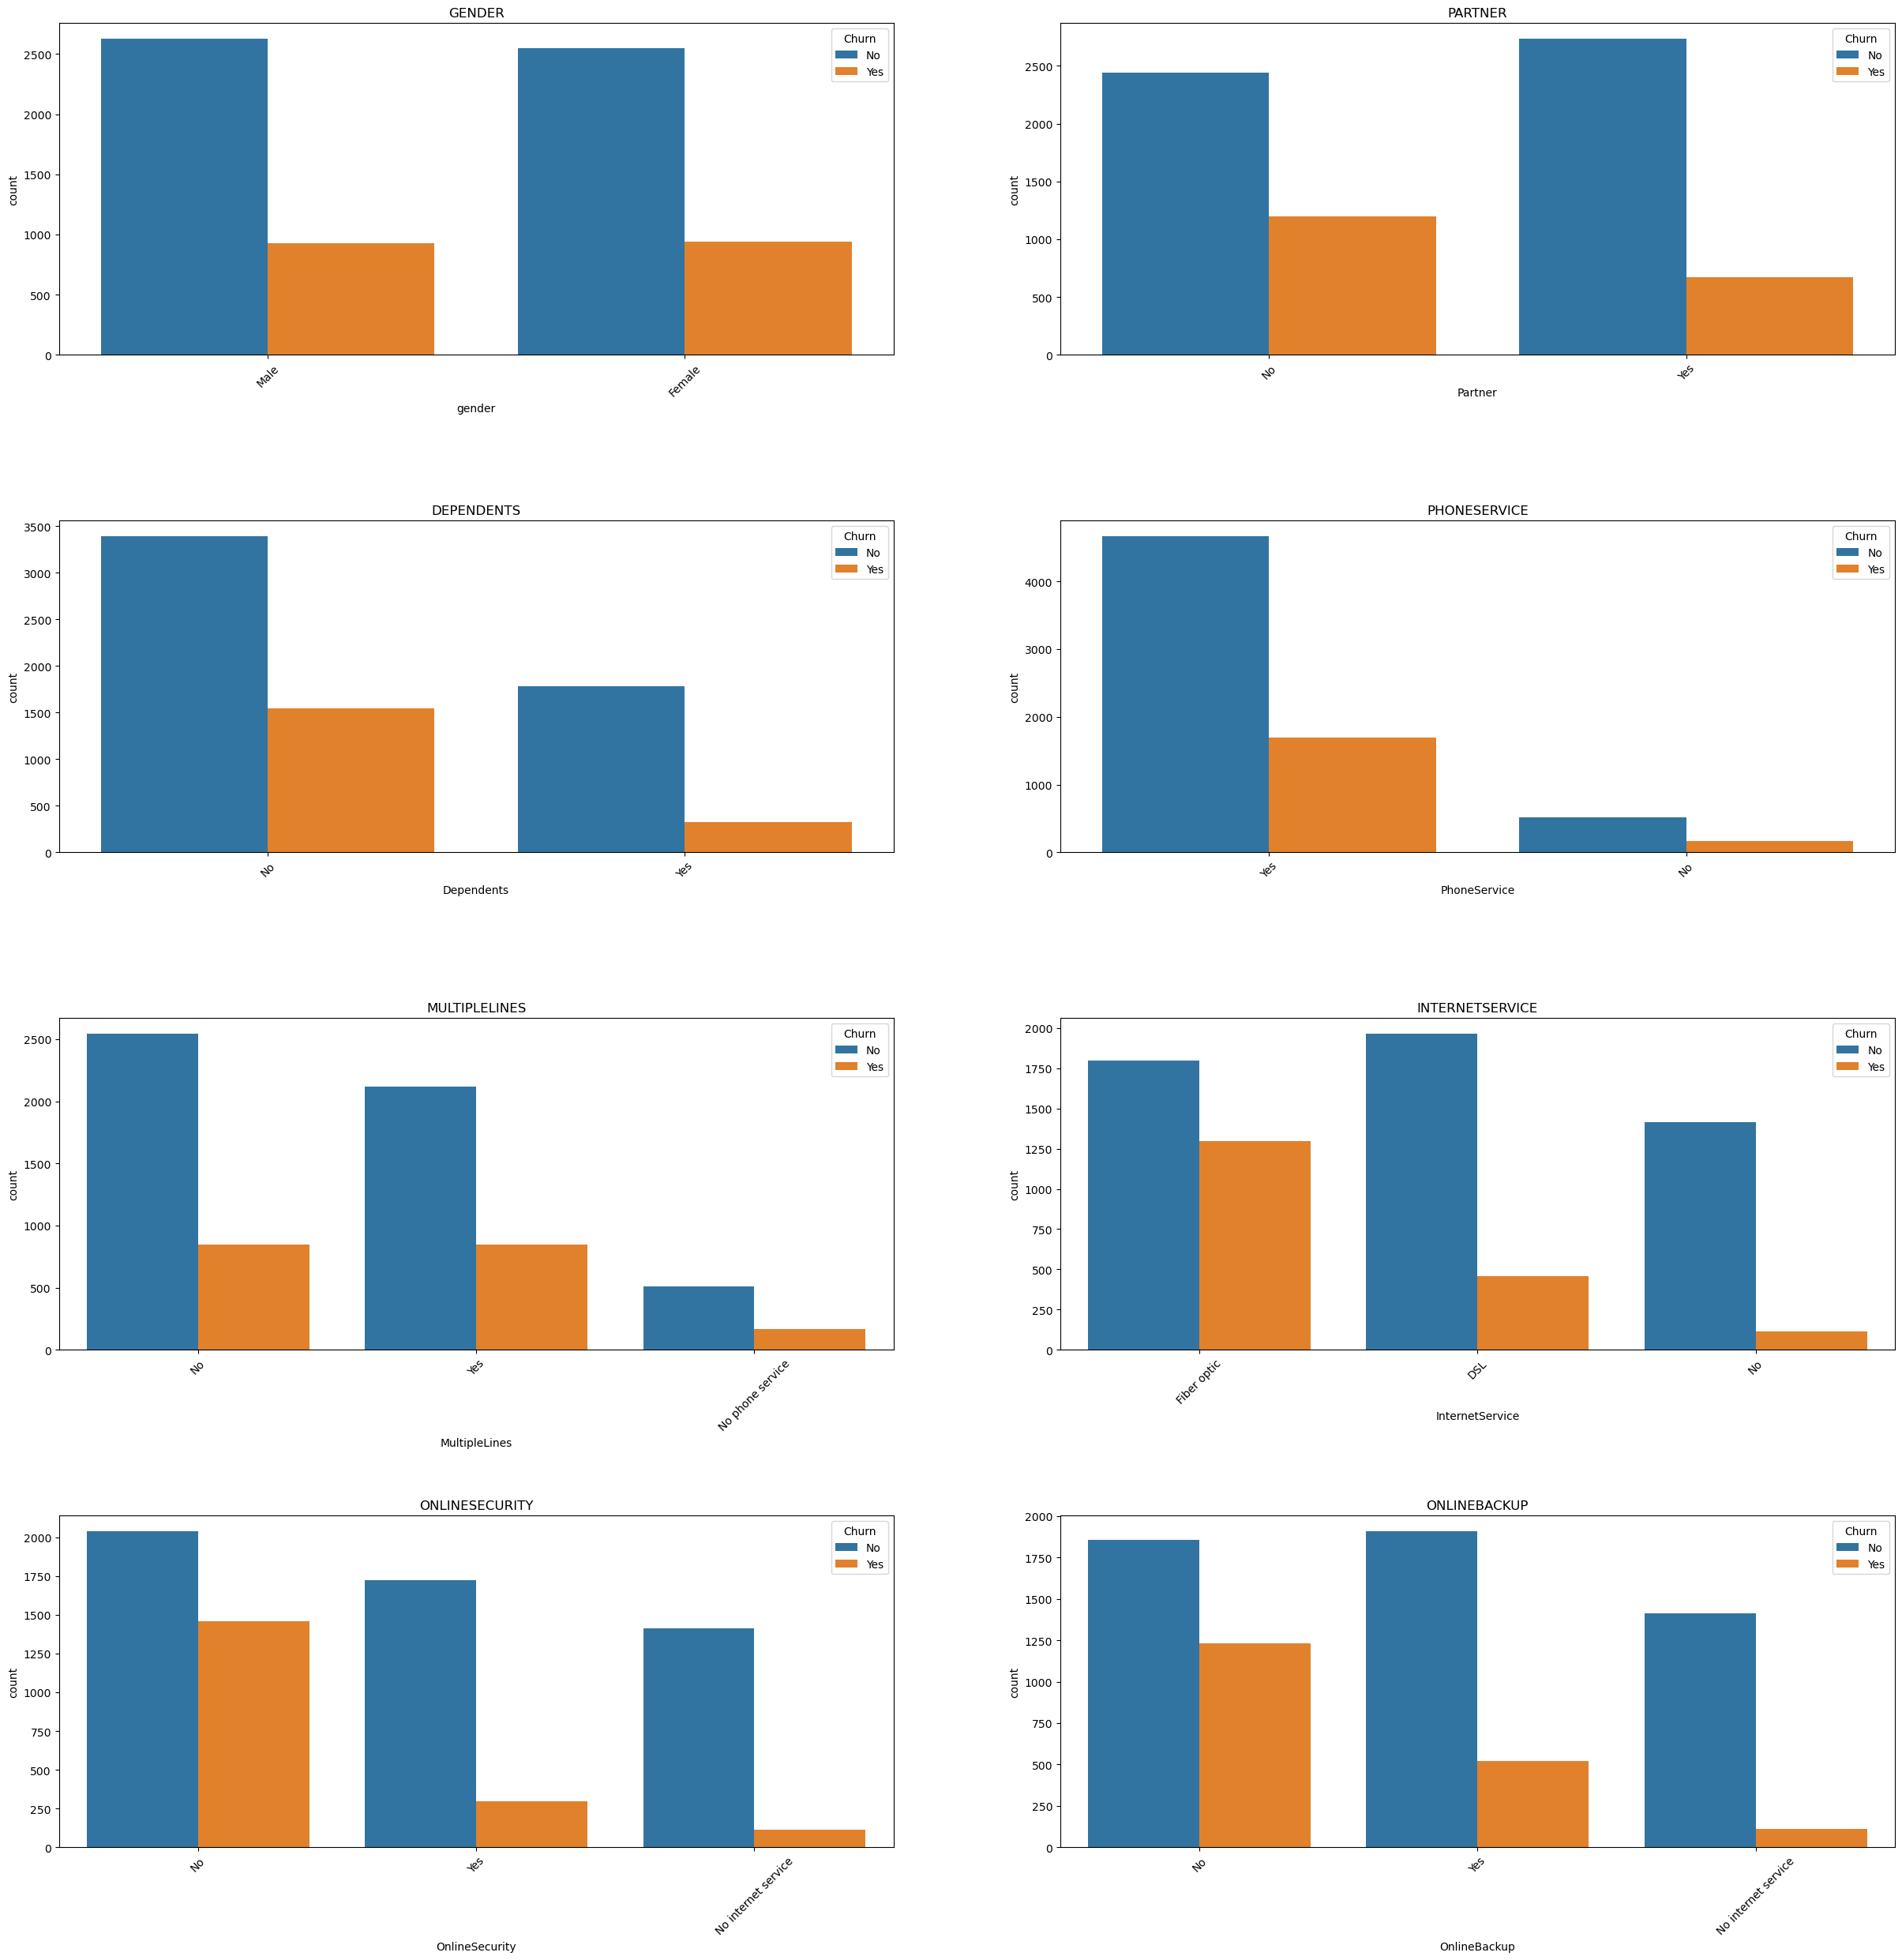

In [23]:
# Creating countplots for the categorical variables
fig,axes = plt.subplots(4,2,figsize = (30,30))
plt.subplots_adjust(hspace=0.5,wspace=0.2)
for i,j in zip(categorical_variables[0:8],axes.flatten()):
    sns.countplot(x = i,ax = j,data = churn,order = list(churn[i].value_counts().index), hue='Churn')
    j.set_xticklabels(labels = list(churn[i].value_counts().index),rotation = 45)
    j.set_title(i.upper())

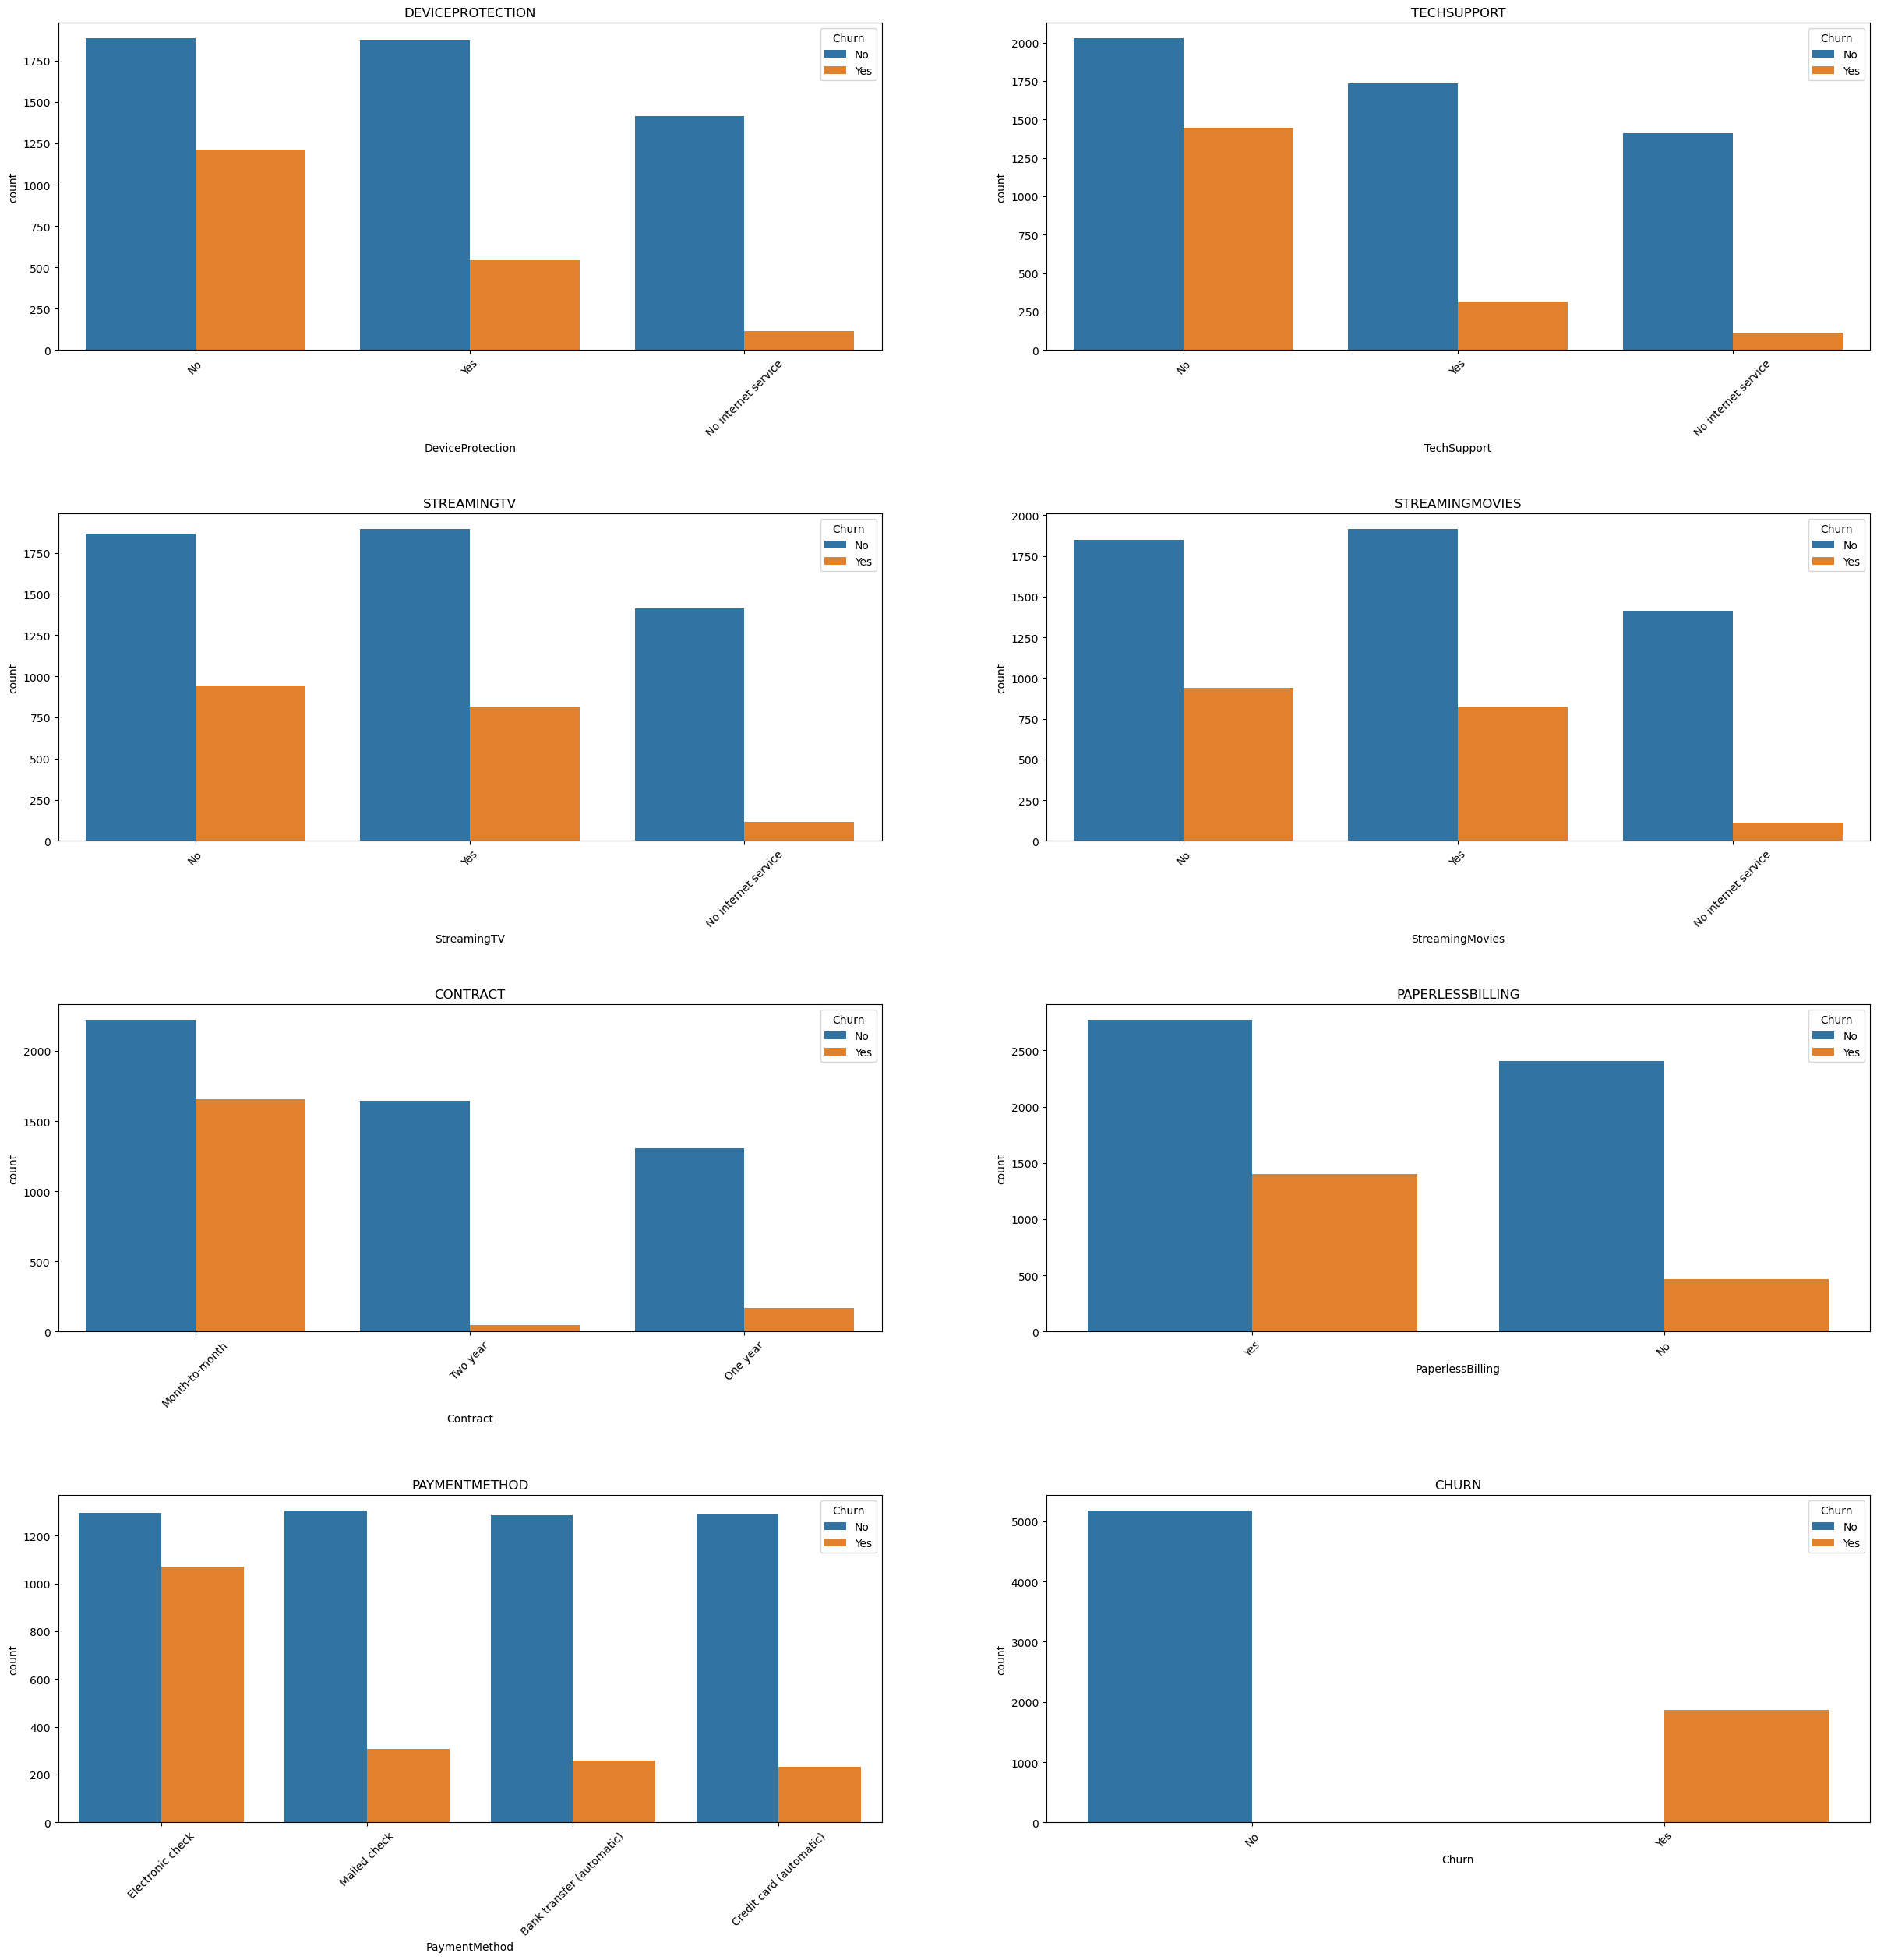

In [24]:
# Creating countplots for the categorical variables
fig,axes = plt.subplots(4,2,figsize = (30,30))
plt.subplots_adjust(hspace=0.5,wspace=0.2)
for i,j in zip(categorical_variables[8:],axes.flatten()):
    sns.countplot(x = i,ax = j,data = churn,order = list(churn[i].value_counts().index), hue='Churn')
    j.set_xticklabels(labels = list(churn[i].value_counts().index),rotation = 45)
    j.set_title(i.upper())

In [25]:
# Creating dummy variables for all the categorical variables
churn_dummy = pd.get_dummies(churn, columns = categorical_variables)

In [26]:
# Top 5 +ve correlations w Churn_Yes
churn_dummy.corr()[['Churn_Yes']].sort_values(by= 'Churn_Yes', ascending = False).head(10)

/var/folders/wm/c9ks71w95s35n6j8r61gvcg40000gn/T/ipykernel_65096/407701551.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_dummy.corr()[['Churn_Yes']].sort_values(by= 'Churn_Yes', ascending = False).head(10)


,Churn_Yes
Churn_Yes,1.000000
Contract_Month-to-month,0.405103
OnlineSecurity_No,0.342637
TechSupport_No,0.337281
InternetService_Fiber optic,0.308020
PaymentMethod_Electronic check,0.301919
OnlineBackup_No,0.268005
DeviceProtection_No,0.252481
MonthlyCharges,0.193356
PaperlessBilling_Yes,0.191825


In [27]:
# Top 5 -ve correlations w Churn_Yes
churn_dummy.corr()[['Churn_Yes']].sort_values(by= 'Churn_Yes', ascending = True).head(10)

/var/folders/wm/c9ks71w95s35n6j8r61gvcg40000gn/T/ipykernel_65096/3579835608.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_dummy.corr()[['Churn_Yes']].sort_values(by= 'Churn_Yes', ascending = True).head(10)


,Churn_Yes
Churn_No,-1.000000
tenure,-0.352229
Contract_Two year,-0.302253
StreamingMovies_No internet service,-0.227890
StreamingTV_No internet service,-0.227890
TechSupport_No internet service,-0.227890
DeviceProtection_No internet service,-0.227890
OnlineBackup_No internet service,-0.227890
OnlineSecurity_No internet service,-0.227890
InternetService_No,-0.227890


# Summary 
<a id="summary"></a>

## Data preparation

*   We loaded the csv, had a quick look into our dataset using head and info.
*   Identified missing values in the TotalCharges column and imputed with the mean.
*   3 of our variables are numeric, and the other 18 are categorical.
*   We did not use customerID as it was not relevant for our analysis.


## Univariate analysis

*   For the numerical variables, we created histograms and boxplots to see how the data is distributed. And for the categorical variables, we created countplots to check the distribution.
*   Tenure is bimodal, with customers staying an average of 32 months. A little over 1200 customers leave within the first month. We also have extremely loyal customers who have stayed with us for around 70 months.
*   Monthly charges have an average of 64, but around 1200 have monthly charges around 20, and this could mean that they are first time users who are paying a discounted price.
*   The total charges column is right tailed with the majority of them paying between 0 and 2000.
*   Our gender ratio and partner(yes/no) ratio are more or less 50:50.
*   70% of our customers do not have dependents, and 83% are not senior citizens.
*   48% have a single phone line, 42% have multiple lines, and 10% do not have a phone line.
*   22% do not have internet service, 44% choose fiber optic internet, and 32% choose DSL.
*   22% do not have OnlineSecurity, 44% choose Yes for OnlineBackup, and 32% choose No internet service for OnlineProtection.
*   22% do not have OnlineBackup, 44% choose Yes for DeviceProtection, and 32% choose No internet service for DeviceProtection.
*   22% do not have DeviceProtection, 44% choose Yes for TechSupport, and 32% choose No internet service for TechSupport.
*   22% do not have TechSupport, 40% choose Yes for StreamingTV, and 38% choose Yes for StreamingMovies.
*   55% choose Month-to-month, 24% choose Two year, and 21% choose One year for Contract.
*   59% choose Yes for PaperlessBilling, and 41% choose No for PaperlessBilling.
*   34% choose Electronic check, 23% choose Mailed check, 22% choose Bank transfer (automatic), and 22% choose Credit card (automatic) for PaymentMethod.
*   73% customers do not Churn, and 27% Churn.


## Bivariate analysis

*   We compared the effect of churn on all the other variables. From the graphs, we can see the effect of churn on each variable.
*   Most of the customers who churned, had a short tenure, and had higher monthly charges.
*   We also created a correlation matrix, using dummy variables for all the categorical variables. We wanted to see what were the main reasons for customers churning.
*   From the matrix we can see, customers who were on monthly contracts, did not have online security and tech support, and were on fiber optic, were more likely to churn.
* On the other hand, customers who were longtime users, had two year contracts, and did not have internet service, were more likely to churn.


## Recommendations

*   A lot of the customers who churn, adopt a monthly model, so offering the users a better monthly price or lucrative offers on the yearly contracts might reduce churn and increase customer loyalty.
*   The fiber optic internet connection might be a bit problematic, as a lot of the customers in that category churn. So it could be good to analyse if the fiber optic services could be improved to be more reliable and efficient.
*   Educating customers about the value of additional services like online security, tech support, and device protection may reduce churn among customers who currently lack these services.
* Identify and resolve any issues related to electronic check payments, as customers using this payment method have a higher churn rate. 
*   Since paperless billing is associated with higher churn, consider targeted marketing campaigns to promote the benefits of paperless billing. Offer incentives or discounts to encourage more customers to adopt paperless billing.